In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt

In [12]:
filename = "dataset/labor.csv"
labor = pd.read_csv(filename, sep='\t')
labor.head()

,Unnamed: 0,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
0,0,6.56611,0.0,71.34866,49.93293,4.01096,7.63611,16.53642,4.12686,62.82161,38.94182,613-31-7943,married,6.15761,no,7.24929,7.40249,Terry Walker
1,1,6.57510,0.0,73.19819,50.61146,7.36386,4.45735,12.41316,6.89853,64.10856,39.93677,071-29-7068,widowed,5.02794,no,7.41189,7.05999,Christopher Mccall
2,2,7.46203,1.0,12.80221,45.76702,7.86319,6.46036,7.75601,6.02906,62.88964,36.82128,465-01-6369,married,4.67262,Y,9.91113,5.59064,Mrs. Alisha Jackson DVM
3,3,5.15667,1.0,86.69531,41.73339,4.49672,3.99015,3.84333,6.71704,72.09725,64.70210,698-87-9617,single,6.40977,Y,6.55248,5.71480,Crystal Dean
4,4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,-3.98413,209-04-2399,separated,5.65006,no,3.15066,5.61537,Joseph Garza


In [13]:
filename = "dataset/profiles.csv"
profiles = pd.read_csv(filename, sep='\t')
profiles.head()

,Unnamed: 0,blood_group,job,sex,name,company,race,ssn,birthdate,current_location
0,0,A-,Pension scheme manager,F,Megan Wells,Smith-Lawrence,Indian,788-45-8299,"08/15/1913, 00:00:00","(Decimal('-2.7462585'), Decimal('-56.259761'))"
1,1,AB+,"Psychotherapist, child",F,Barbara Patel,Oneal and Sons,Hawaiian,291-49-5180,"10/29/1905, 00:00:00","(Decimal('-54.1724985'), Decimal('163.273340'))"
2,2,B-,"Engineer, drilling",F,Brianna Lane,Morris-Arnold,Asian,146-49-1796,1980/05/13,"(Decimal('39.8342665'), Decimal('-54.720127'))"
3,3,A-,"Engineer, mining",M,William Cooper,Dunn LLC,White,700-73-0733,1921-12-14,"(Decimal('-76.8352515'), Decimal('-0.539735'))"
4,4,A+,Restaurant manager,F,Holly Williams,Bailey-Sullivan,White,748-70-9973,1924-12-30,"(Decimal('-59.667122'), Decimal('81.468274'))"


# 1. Základný opis dát spolu s ich charakteristikami
- počet záznamov,
- počet atribútov,
- ich typy,
- pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

In [14]:
# number of records
profiles.shape[0]

3123

In [15]:
# number of records
labor.shape[0]

9976

In [16]:
# number of atributes
profiles.columns.size

10

In [17]:
# number of atributes
labor.columns.size

18

In [18]:
# types of atributes
profiles.dtypes

Unnamed: 0           int64
blood_group         object
job                 object
sex                 object
name                object
company             object
race                object
ssn                 object
birthdate           object
current_location    object
dtype: object

In [19]:
# types of atributes
labor.dtypes

Unnamed: 0        int64
etytr           float64
indicator       float64
alp             float64
er-cv           float64
leukocyty       float64
hbver           float64
alt             float64
trombocyty      float64
ast             float64
weight          float64
ssn              object
relationship     object
hematokrit      float64
smoker           object
hemoglobin      float64
erytrocyty      float64
name             object
dtype: object

# 2. Párová analýza
- Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.

In [20]:
#sns.pairplot(labor[:100])

# Check for null values and basic information about data 

In [21]:
profiles.shape[0] - profiles.dropna().shape[0]

0

In [22]:
labor.shape[0] - labor.dropna().shape[0]

329

In [23]:
labor.isnull().sum()

Unnamed: 0       0
etytr           30
indicator        0
alp             31
er-cv           30
leukocyty       30
hbver           30
alt             30
trombocyty      30
ast             30
weight           0
ssn              0
relationship     0
hematokrit      31
smoker           0
hemoglobin      30
erytrocyty      31
name             0
dtype: int64

In [24]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3123 non-null   int64 
 1   blood_group       3123 non-null   object
 2   job               3123 non-null   object
 3   sex               3123 non-null   object
 4   name              3123 non-null   object
 5   company           3123 non-null   object
 6   race              3123 non-null   object
 7   ssn               3123 non-null   object
 8   birthdate         3123 non-null   object
 9   current_location  3123 non-null   object
dtypes: int64(1), object(9)
memory usage: 244.1+ KB


In [25]:
labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9976 non-null   int64  
 1   etytr         9946 non-null   float64
 2   indicator     9976 non-null   float64
 3   alp           9945 non-null   float64
 4   er-cv         9946 non-null   float64
 5   leukocyty     9946 non-null   float64
 6   hbver         9946 non-null   float64
 7   alt           9946 non-null   float64
 8   trombocyty    9946 non-null   float64
 9   ast           9946 non-null   float64
 10  weight        9976 non-null   float64
 11  ssn           9976 non-null   object 
 12  relationship  9976 non-null   object 
 13  hematokrit    9945 non-null   float64
 14  smoker        9976 non-null   object 
 15  hemoglobin    9946 non-null   float64
 16  erytrocyty    9945 non-null   float64
 17  name          9976 non-null   object 
dtypes: float64(13), int64(1), ob

In [26]:
labor.describe(include='all')

,Unnamed: 0,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
count,9976.000000,9946.000000,9976.000000,9945.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000,9976.000000,9976,9976,9945.000000,9976,9946.000000,9945.000000,9976
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3123,6,NaN,4,NaN,NaN,3061
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,861-86-4443,divoced,NaN,no,NaN,NaN,Robert Johnson
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2561,NaN,5456,NaN,NaN,11
mean,4987.500000,5.818027,0.642141,58.179479,49.871218,5.396771,5.783637,9.167064,6.584805,72.551945,70.297787,NaN,NaN,5.794908,NaN,6.200070,5.798073,NaN
std,2879.967477,0.992826,0.479394,25.759360,13.632812,1.549857,1.682270,3.934239,1.471984,7.222123,34.952176,NaN,NaN,1.000194,NaN,1.705544,1.006324,NaN
min,0.000000,2.104460,0.000000,0.000000,0.000000,0.000000,0.465590,0.000000,0.967360,0.000000,-71.469640,NaN,NaN,2.107220,NaN,0.810320,1.599500,NaN
25%,2493.750000,5.153620,0.000000,35.421200,40.595915,4.279130,4.552373,6.836912,5.644348,67.638627,46.637757,NaN,NaN,5.124940,NaN,4.925607,5.130850,NaN
50%,4987.500000,5.817520,1.000000,63.146670,49.995025,5.185765,5.928270,8.660790,6.708440,72.589835,70.630750,NaN,NaN,5.798180,NaN,6.222180,5.800240,NaN
75%,7481.250000,6.489673,1.000000,81.988480,59.183325,6.421222,7.065975,10.754530,7.569437,77.471355,94.073197,NaN,NaN,6.467370,NaN,7.421258,6.470690,NaN


In [27]:
# List all rows containing null values
labor[labor.isnull().any(axis=1)]

,Unnamed: 0,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
24,24,4.67870,0.0,40.61720,65.84055,4.81551,5.58746,4.68397,NaN,74.83465,113.12785,409-43-1283,divoced,6.09808,no,8.20259,4.17508,James Daniel
84,84,NaN,1.0,72.97158,40.64987,7.14212,6.02901,9.94711,7.47247,66.42493,86.01786,011-38-1168,married,4.39631,no,7.18545,4.14178,Meghan Garner
94,94,4.01809,1.0,32.26899,61.97734,5.68369,9.17297,13.87185,3.74418,72.40242,86.72634,409-43-1283,nop,5.83529,yes,4.09266,NaN,James Daniel
124,124,5.14318,0.0,80.12452,41.39639,NaN,6.83925,8.44584,4.68128,67.34317,35.53901,305-18-3975,separated,5.57690,yes,7.07607,4.59136,Mary Carpenter
208,208,5.24823,1.0,24.92220,30.79911,3.93760,6.47111,33.04987,8.46589,NaN,36.74598,037-76-4977,divoced,5.31014,yes,4.14145,8.63207,Regina Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9844,9844,5.78776,1.0,29.98515,71.16022,5.96796,7.64652,11.39465,NaN,50.24104,96.19817,748-70-9973,widowed,7.05456,yes,4.16839,5.83897,Holly Williams
9881,9881,5.88557,1.0,29.14889,36.05389,4.27246,6.55006,6.60883,8.14150,63.95205,86.46901,779-61-1579,separated,4.11969,Y,3.98632,NaN,Cathy Dean
9888,9888,NaN,1.0,58.21868,42.68911,4.14231,7.90606,6.88902,5.64783,80.65205,111.07323,548-78-1335,divoced,5.82836,no,4.76667,6.42993,Christopher Cortez
9908,9908,5.03432,0.0,90.70412,52.55536,NaN,7.08549,5.04675,3.80445,78.18837,40.77415,366-67-6100,single,5.30154,no,5.94084,4.93684,Alexandria Knapp


In [28]:
#save data to file 
#df.to_csv('dataset/<filename>.tsv', sep='\t', index=False, encoding='utf-8')

In [29]:
labor = labor.rename(columns={'Unnamed: 0':'id'})

In [30]:
# Weight is below 0
labor[labor['weight'] < 0]

,id,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
4,4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,-3.98413,209-04-2399,separated,5.65006,no,3.15066,5.61537,Joseph Garza
12,12,7.45985,0.0,44.89612,71.06880,2.82551,4.25394,8.92940,8.18667,69.71307,-7.45880,057-52-4512,divoced,5.21050,yes,8.09933,6.40121,Donna Acosta
47,47,5.76418,0.0,83.77569,37.34492,4.86190,5.03589,11.24835,6.41601,72.85593,-10.98075,280-99-3868,widowed,5.46548,no,5.65429,4.78133,Christina Harris
66,66,7.40217,1.0,15.34635,52.40322,4.49002,9.83963,13.33373,3.73180,64.56452,-20.43153,191-13-3353,divoced,6.58267,no,3.17575,7.52013,Casey Harris
197,197,5.07686,0.0,84.97279,43.97857,3.98114,7.14523,7.49582,4.57366,74.14419,-5.83706,744-63-3326,married,3.98797,N,6.94458,6.50220,Lisa Santana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,9868,3.79981,0.0,34.62625,56.27918,3.75853,8.46265,6.43348,3.57446,80.12457,-0.75156,148-05-5204,nop,7.43917,yes,8.20493,5.66157,Kimberly Oneal
9876,9876,6.07822,1.0,78.91486,57.24705,7.08122,3.89736,9.86064,7.58186,85.47576,-3.04102,334-01-9397,nop,6.77781,yes,5.62884,4.09318,Timothy Miller
9882,9882,6.65452,0.0,23.74081,63.90448,5.79564,8.73818,8.34635,2.72969,70.85690,-10.42991,466-65-7754,single,5.50550,yes,8.57765,6.33862,Ralph Chen
9897,9897,7.08630,0.0,67.54793,63.45475,4.56532,4.25441,10.10955,7.22103,70.47193,-8.55406,877-59-5554,single,6.77324,no,7.46819,3.84360,Stephanie Estrada


array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

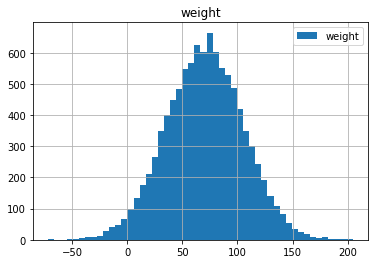

In [31]:
labor.hist(column='weight', legend=1, bins=50)

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

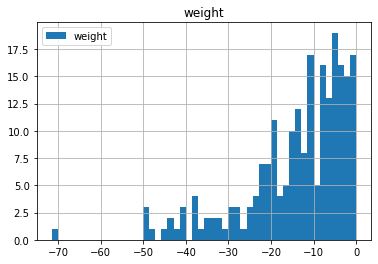

In [32]:
labor[labor['weight'] <= 0].hist(column='weight', legend=1, bins=50)

In [33]:
len(labor[labor['weight'] <= 0])

220

In [34]:
#convert to date 
profiles.birthdate = pd.to_datetime(profiles.birthdate)

In [35]:
profiles.head()

,Unnamed: 0,blood_group,job,sex,name,company,race,ssn,birthdate,current_location
0,0,A-,Pension scheme manager,F,Megan Wells,Smith-Lawrence,Indian,788-45-8299,1913-08-15,"(Decimal('-2.7462585'), Decimal('-56.259761'))"
1,1,AB+,"Psychotherapist, child",F,Barbara Patel,Oneal and Sons,Hawaiian,291-49-5180,1905-10-29,"(Decimal('-54.1724985'), Decimal('163.273340'))"
2,2,B-,"Engineer, drilling",F,Brianna Lane,Morris-Arnold,Asian,146-49-1796,1980-05-13,"(Decimal('39.8342665'), Decimal('-54.720127'))"
3,3,A-,"Engineer, mining",M,William Cooper,Dunn LLC,White,700-73-0733,1921-12-14,"(Decimal('-76.8352515'), Decimal('-0.539735'))"
4,4,A+,Restaurant manager,F,Holly Williams,Bailey-Sullivan,White,748-70-9973,1924-12-30,"(Decimal('-59.667122'), Decimal('81.468274'))"


In [36]:
profiles.groupby('race').count()

,Unnamed: 0,blood_group,job,sex,name,company,ssn,birthdate,current_location
race,,,,,,,,,
Asian,333,333,333,333,333,333,333,333,333
Black,751,751,751,751,751,751,751,751,751
Hawaiian,148,148,148,148,148,148,148,148,148
Indian,149,149,149,149,149,149,149,149,149
White,1559,1559,1559,1559,1559,1559,1559,1559,1559
black,121,121,121,121,121,121,121,121,121
blsck,32,32,32,32,32,32,32,32,32
white,30,30,30,30,30,30,30,30,30


In [37]:
# Replace typos in race
profiles['race'].replace({'blsck':'Black', 'black':'Black', 'white':'White'}, inplace=True)

In [38]:
profiles.groupby('race').count().iloc[:,0]

race
Asian        333
Black        904
Hawaiian     148
Indian       149
White       1589
Name: Unnamed: 0, dtype: int64

In [39]:
labor.groupby('smoker').count()

,id,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,hemoglobin,erytrocyty,name
smoker,,,,,,,,,,,,,,,,,
N,472,469,472,471,472,470,470,471,468,470,472,472,472,471,470,469,472
Y,2012,2010,2012,2006,2007,2006,2005,2008,2006,2009,2012,2012,2012,2005,2005,2006,2012
no,5456,5438,5456,5436,5441,5441,5444,5437,5446,5438,5456,5456,5456,5439,5441,5441,5456
yes,2036,2029,2036,2032,2026,2029,2027,2030,2026,2029,2036,2036,2036,2030,2030,2029,2036


In [40]:
# normalize smoker answers for binary attributes
labor['smoker'].replace({'N':0, 'Y':1, 'no':0, 'yes':0}, inplace=True)

In [41]:
labor.groupby('smoker').count()

,id,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,hemoglobin,erytrocyty,name
smoker,,,,,,,,,,,,,,,,,
0,7964,7936,7964,7939,7939,7940,7941,7938,7940,7937,7964,7964,7964,7940,7941,7939,7964
1,2012,2010,2012,2006,2007,2006,2005,2008,2006,2009,2012,2012,2012,2005,2005,2006,2012


In [42]:
labor.groupby('relationship').count()

,id,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,hematokrit,smoker,hemoglobin,erytrocyty,name
relationship,,,,,,,,,,,,,,,,,
divoced,2561,2556,2561,2555,2555,2555,2554,2554,2556,2555,2561,2561,2553,2561,2553,2551,2561
married,2554,2542,2554,2552,2545,2546,2543,2548,2542,2544,2554,2554,2545,2554,2544,2549,2554
nop,964,959,964,960,960,960,963,961,963,960,964,964,961,964,962,961,964
separated,1008,1004,1008,1004,1005,1003,1004,1004,1007,1006,1008,1008,1006,1008,1005,1004,1008
single,1904,1902,1904,1894,1899,1897,1901,1895,1897,1900,1904,1904,1899,1904,1898,1898,1904
widowed,985,983,985,980,982,985,981,984,981,981,985,985,981,985,984,982,985


In [43]:
profiles.groupby('blood_group').count()

,Unnamed: 0,job,sex,name,company,race,ssn,birthdate,current_location
blood_group,,,,,,,,,
A+,380,380,380,380,380,380,380,380,380
A-,362,362,362,362,362,362,362,362,362
AB+,368,368,368,368,368,368,368,368,368
AB-,405,405,405,405,405,405,405,405,405
B+,420,420,420,420,420,420,420,420,420
B-,387,387,387,387,387,387,387,387,387
O+,413,413,413,413,413,413,413,413,413
O-,388,388,388,388,388,388,388,388,388


In [44]:
profiles.groupby('job').count()

,Unnamed: 0,blood_group,sex,name,company,race,ssn,birthdate,current_location
job,,,,,,,,,
Academic librarian,7,7,7,7,7,7,7,7,7
Accommodation manager,8,8,8,8,8,8,8,8,8
"Accountant, chartered",4,4,4,4,4,4,4,4,4
"Accountant, chartered certified",6,6,6,6,6,6,6,6,6
"Accountant, chartered management",3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
Water quality scientist,5,5,5,5,5,5,5,5,5
Web designer,5,5,5,5,5,5,5,5,5
Wellsite geologist,6,6,6,6,6,6,6,6,6


In [45]:
profiles.groupby('sex').count()

,Unnamed: 0,blood_group,job,name,company,race,ssn,birthdate,current_location
sex,,,,,,,,,
F,1557,1557,1557,1557,1557,1557,1557,1557,1557
M,1566,1566,1566,1566,1566,1566,1566,1566,1566


## Parová analýza
V tejto časti sa snažíme vybrať atribúty ktoré maju tendenciu korelovať resp. súvisieť spolu
- smoker - indcator
- 

In [46]:


c = profiles.corr().abs()

In [47]:
print(c)

            Unnamed: 0
Unnamed: 0         1.0


In [48]:
labor.groupby('smoker')['indicator'].count()


smoker
0    7964
1    2012
Name: indicator, dtype: int64

In [73]:
labor.corr().abs()

,id,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,hematokrit,smoker,hemoglobin,erytrocyty
id,1.000000,0.001870,0.003609,0.006367,0.010615,0.013982,0.006832,0.027109,0.011370,0.002292,0.017179,0.014487,0.000460,0.005571,0.030353
etytr,0.001870,1.000000,0.002677,0.005931,0.006803,0.012705,0.007211,0.006790,0.000959,0.006354,0.011448,0.015165,0.003645,0.006138,0.001110
indicator,0.003609,0.002677,1.000000,0.224595,0.002246,0.337035,0.012492,0.000754,0.366306,0.008671,0.018537,0.001674,0.014077,0.301134,0.007270
alp,0.006367,0.005931,0.224595,1.000000,0.010191,0.078886,0.341190,0.008063,0.077003,0.026412,0.005256,0.002289,0.004245,0.088604,0.001011
er-cv,0.010615,0.006803,0.002246,0.010191,1.000000,0.015635,0.012464,0.020608,0.004520,0.003913,0.010835,0.004211,0.012251,0.015921,0.015189
leukocyty,0.013982,0.012705,0.337035,0.078886,0.015635,1.000000,0.262059,0.012694,0.126250,0.012315,0.014147,0.012380,0.008685,0.138055,0.026031
hbver,0.006832,0.007211,0.012492,0.341190,0.012464,0.262059,1.000000,0.038647,0.470853,0.004317,0.013377,0.002894,0.001907,0.227680,0.026650
alt,0.027109,0.006790,0.000754,0.008063,0.020608,0.012694,0.038647,1.000000,0.027616,0.003910,0.014332,0.013710,0.007104,0.006133,0.624905
trombocyty,0.011370,0.000959,0.366306,0.077003,0.004520,0.126250,0.470853,0.027616,1.000000,0.016790,0.006108,0.008689,0.011909,0.332206,0.008307
ast,0.002292,0.006354,0.008671,0.026412,0.003913,0.012315,0.004317,0.003910,0.016790,1.000000,0.010251,0.000493,0.010034,0.007493,0.009204


In [57]:
c_m = labor.corr().abs()
sorted_mat = c_m.unstack().sort_values()

In [70]:
pd.set_option('display.max_rows', sorted_mat.shape[0]+1)
print(sorted_mat)
# TODO: Vypisat values

smoker      id            0.000460
id          smoker        0.000460
hematokrit  ast           0.000493
ast         hematokrit    0.000493
alt         indicator     0.000754
indicator   alt           0.000754
etytr       trombocyty    0.000959
trombocyty  etytr         0.000959
alp         erytrocyty    0.001011
erytrocyty  alp           0.001011
            etytr         0.001110
etytr       erytrocyty    0.001110
hematokrit  indicator     0.001674
indicator   hematokrit    0.001674
smoker      hematokrit    0.001706
hematokrit  smoker        0.001706
etytr       id            0.001870
id          etytr         0.001870
smoker      hbver         0.001907
hbver       smoker        0.001907
indicator   er-cv         0.002246
er-cv       indicator     0.002246
hematokrit  alp           0.002289
alp         hematokrit    0.002289
id          ast           0.002292
ast         id            0.002292
hemoglobin  smoker        0.002599
smoker      hemoglobin    0.002599
indicator   etytr   

In [52]:
profiles.select_dtypes(include=np.number).corr()

,Unnamed: 0
Unnamed: 0,1.0


In [74]:
# Percent missing
percent_missing = labor.isnull().sum() * 100 / len(labor)
missing_value_df = pd.DataFrame({'column_name': labor.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

               column_name  percent_missing
id                      id         0.000000
etytr                etytr         0.300722
indicator        indicator         0.000000
alp                    alp         0.310746
er-cv                er-cv         0.300722
leukocyty        leukocyty         0.300722
hbver                hbver         0.300722
alt                    alt         0.300722
trombocyty      trombocyty         0.300722
ast                    ast         0.300722
weight              weight         0.000000
ssn                    ssn         0.000000
relationship  relationship         0.000000
hematokrit      hematokrit         0.310746
smoker              smoker         0.000000
hemoglobin      hemoglobin         0.300722
erytrocyty      erytrocyty         0.310746
name                  name         0.000000


In [78]:
merged = pd.merge(labor, profiles, how='inner', left_on=['name'], right_on=['name'])

In [87]:
profiles['name_duplicates'] = profiles.duplicated()


In [88]:
profiles[profiles['name_duplicates'] == True]

,Unnamed: 0,blood_group,job,sex,name,company,race,ssn,birthdate,current_location,name_duplicates


In [86]:
profiles[profiles['name'] == 'Michael Ramirez']

,Unnamed: 0,blood_group,job,sex,name,company,race,ssn,birthdate,current_location,name_duplicates
61,61,B+,Orthoptist,M,Michael Ramirez,"Snyder, Orr and Vargas",White,243-68-7147,1972-09-24,"(Decimal('85.995780'), Decimal('-62.564263'))",False
264,264,O+,Records manager,M,Michael Ramirez,"Burns, Wright and Todd",Black,663-85-4778,1955-11-12,"(Decimal('55.7663725'), Decimal('-22.558214'))",True


In [96]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].describe()

,hemoglobin,hbver,trombocyty,leukocyty,alt
count,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000
mean,6.200070,5.783637,6.584805,5.396771,9.167064
std,1.705544,1.682270,1.471984,1.549857,3.934239
min,0.810320,0.465590,0.967360,0.000000,0.000000
25%,4.925607,4.552373,5.644348,4.279130,6.836912
50%,6.222180,5.928270,6.708440,5.185765,8.660790
75%,7.421258,7.065975,7.569437,6.421222,10.754530
max,12.119600,11.636340,11.911000,11.345060,100.000000


In [97]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].median()

hemoglobin    6.222180
hbver         5.928270
trombocyty    6.708440
leukocyty     5.185765
alt           8.660790
dtype: float64

In [122]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].skew()

hemoglobin    0.045604
hbver        -0.255204
trombocyty   -0.230527
leukocyty     0.389468
alt           3.683199
dtype: float64

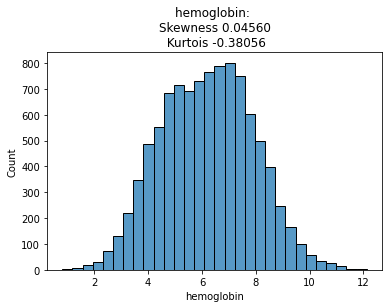

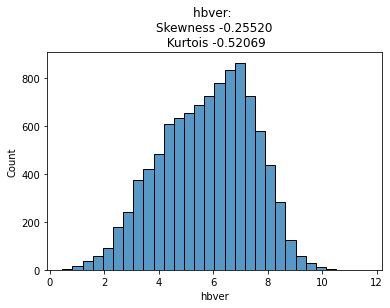

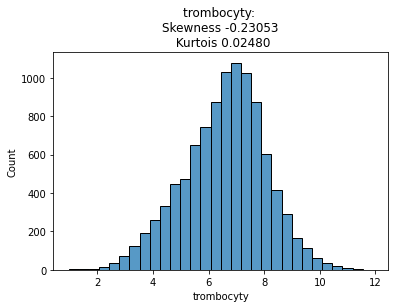

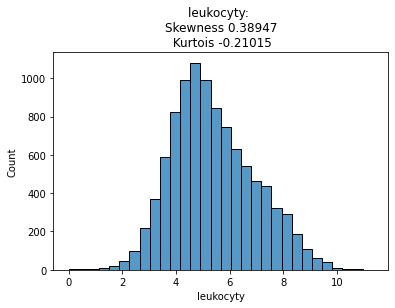

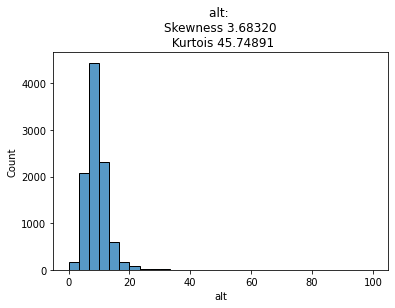

In [129]:
sns.histplot(labor.hemoglobin, bins=30)
plt.title("hemoglobin: \n""Skewness %.5f\n Kurtois %.5f" % (labor.hemoglobin.skew(), labor.hemoglobin.kurtosis()))
plt.show()

sns.histplot(labor.hbver, bins=30)
plt.title("hbver: \n""Skewness %.5f\n Kurtois %.5f" % (labor.hbver.skew(), labor.hbver.kurtosis()))

plt.show()

sns.histplot(labor.trombocyty, bins=30)
plt.title("trombocyty: \n""Skewness %.5f\n Kurtois %.5f" % (labor.trombocyty.skew(), labor.trombocyty.kurtosis()))
plt.show()

sns.histplot(labor.leukocyty, bins=30)
plt.title("leukocyty: \n""Skewness %.5f\n Kurtois %.5f" % (labor.leukocyty.skew(), labor.leukocyty.kurtosis()))
plt.show()

sns.histplot(labor.alt, bins=30)
plt.title("alt: \n""Skewness %.5f\n Kurtois %.5f" % (labor.alt.skew(), labor.alt.kurtosis()))
plt.show()


In [121]:
stats.skew(labor.hemoglobin)

nan